# Phase 1 - Week 3 - Day 2 AM - Clustering: Part 1

# A. K-Means

In the first tutorial, we will implement K-Means clustering with a dataset that contains weekly sales. This dataset contains the number of sales for 51 week.

Source : [link](https://www.kaggle.com/datasets/crawford/weekly-sales-transactions)

In [1]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #turn off warning

from sklearn.preprocessing import StandardScaler

In [2]:
# Data loading

sales_transactions_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w3/P1W3D2AM%20-%20Clustering%20-%20Part%201%20-%20Sales%20Transactions.csv')
sales_transactions_df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,...,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,...,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,2,0


Because KMeans can only perform clustering on numeric features, column `Product_Code` will be temporarily removed. After the clustering process is complete, this column will be reused.

In [3]:
# Get only the transactions

sales_df = sales_transactions_df.drop('Product_Code', axis=1)
sales_df

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,...,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,...,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,2,0


## A.1 - Dimensionality Reduction

Before performing clustering, dimensionality reduction will be carried out using PCA for the following reasons:

1. It is evident that we have a **very large number of features**.

2. Many cases have shown that when KMeans utilizes the results of PCA, **the clustering outcome is better** than without using PCA. If you are interested in exploring the relationship between PCA and KMeans, you can read the following [journal](https://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf).

In [4]:
# Feature scaling
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_df)

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(sales_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

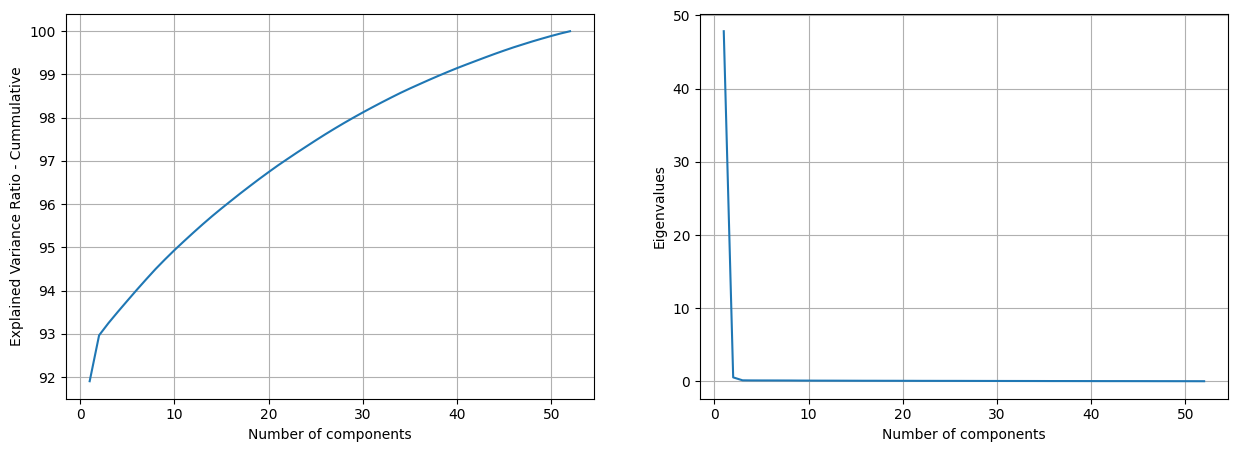

In [5]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 53), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 53), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [6]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(11)

We will reduce the features from 51 features to only 11 features.

In [7]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(sales_scaled)

sales_scaled_pca = pca.transform(sales_scaled)

## A.2 - Find the Optimal Number of Clusters

The next challenge is how many cluster do we need ? To answer this question, we will try to find the optimal number of clusters between 2 clusters and 15 clusters.

### Using Elbow Method

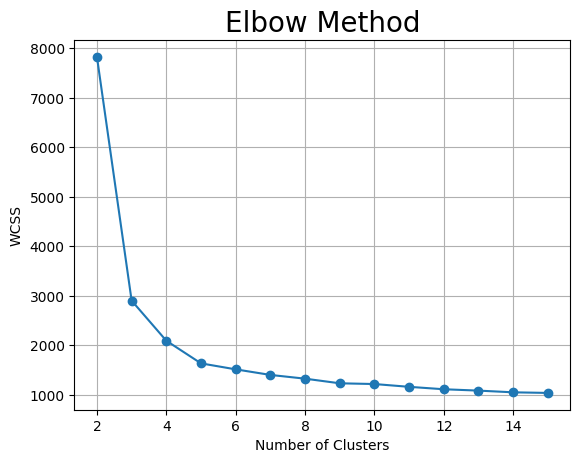

In [8]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(sales_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

---
**CONCLUSION**

Based on the plot above, the location of the elbow is in cluster 4.

### Using Silhoutte Plot & Silhoutte Score

#### Source : from Scikit-Learn

Next, we will find the silhouette score and silhouette plot. The following code is taken from [Scikit-Learn documentation page](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

In [9]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.7662477255381946
For n_clusters = 3 The average silhouette_score is : 0.6880044091122086
For n_clusters = 4 The average silhouette_score is : 0.6552886991199368
For n_clusters = 5 The average silhouette_score is : 0.6007850121222739
For n_clusters = 6 The average silhouette_score is : 0.527247919528312
For n_clusters = 7 The average silhouette_score is : 0.48904487145286063
For n_clusters = 8 The average silhouette_score is : 0.48864547853879425
For n_clusters = 9 The average silhouette_score is : 0.49126981362366706
For n_clusters = 10 The average silhouette_score is : 0.4808534350443538
For n_clusters = 11 The average silhouette_score is : 0.487644225040401
For n_clusters = 12 The average silhouette_score is : 0.4188664217690004
For n_clusters = 13 The average silhouette_score is : 0.4158009431873112
For n_clusters = 14 The average silhouette_score is : 0.3771208905894753


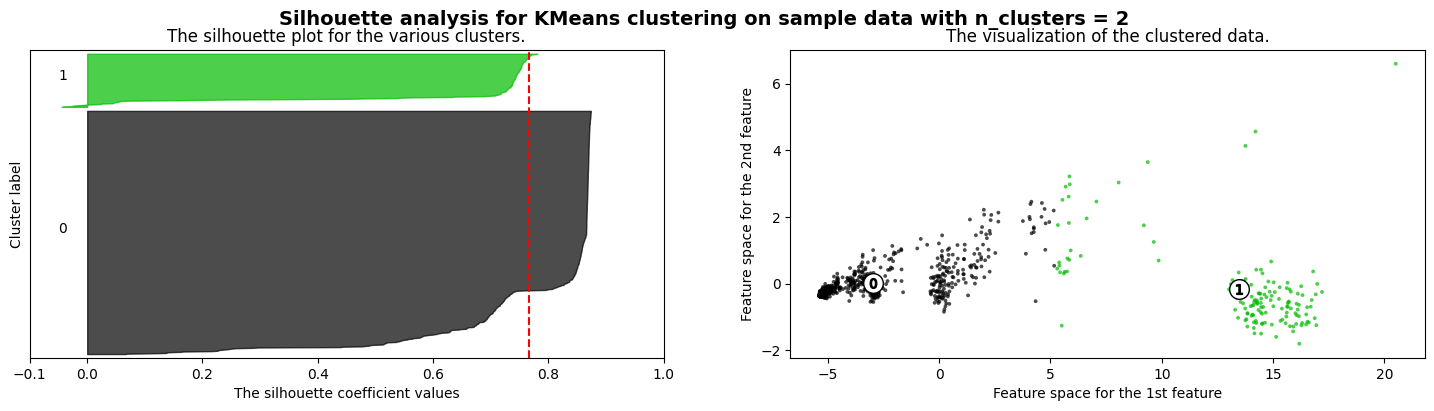

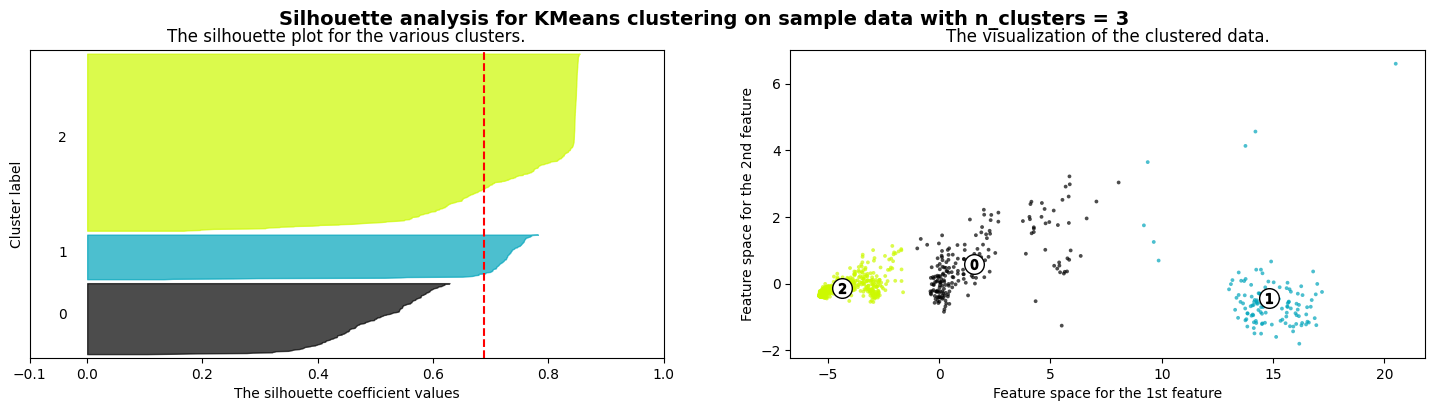

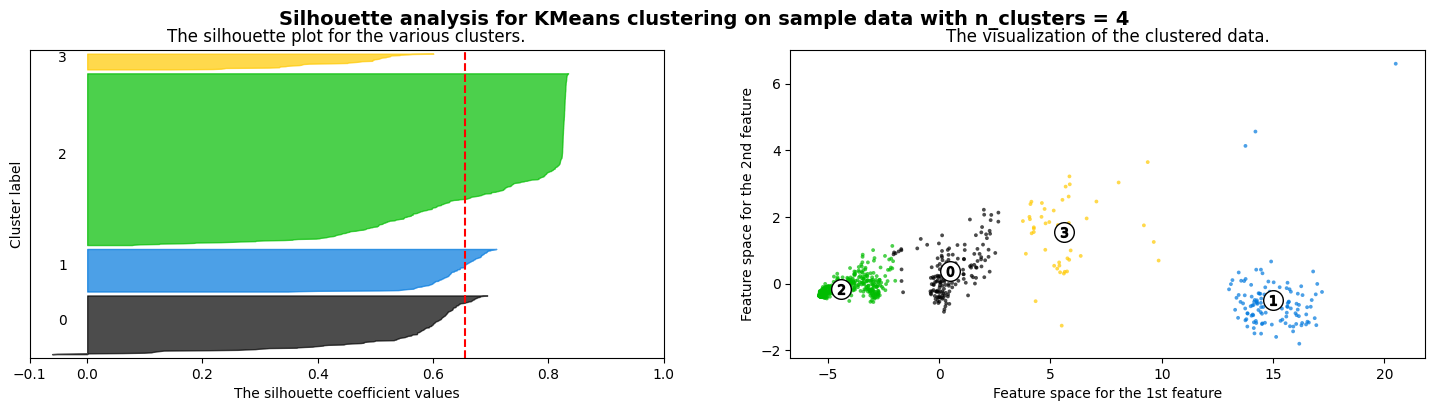

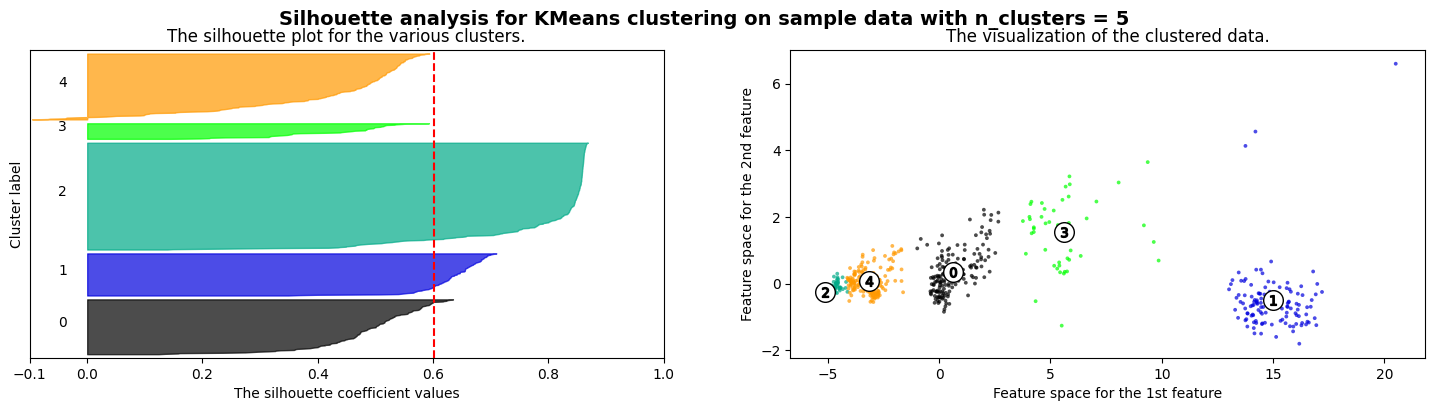

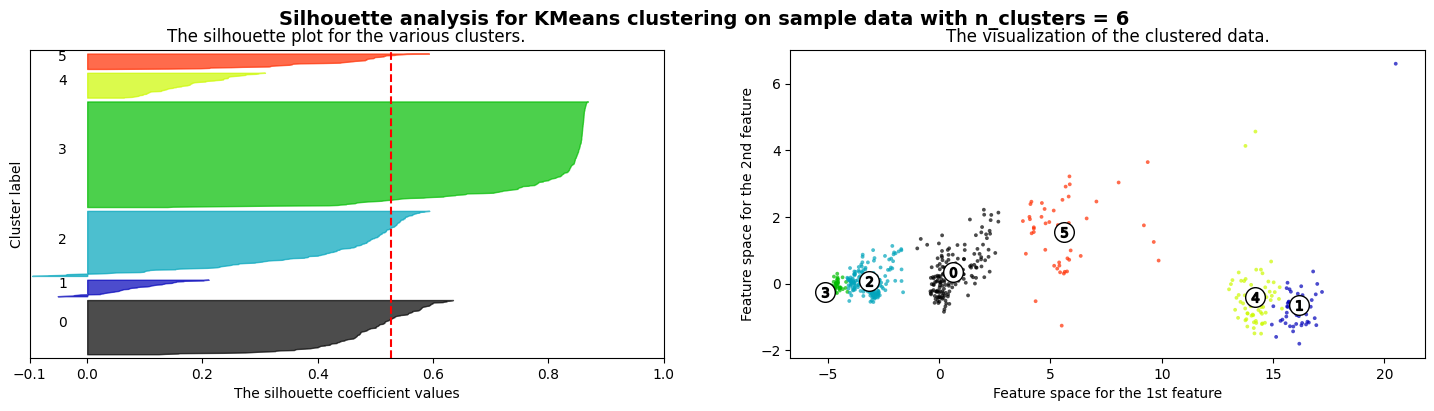

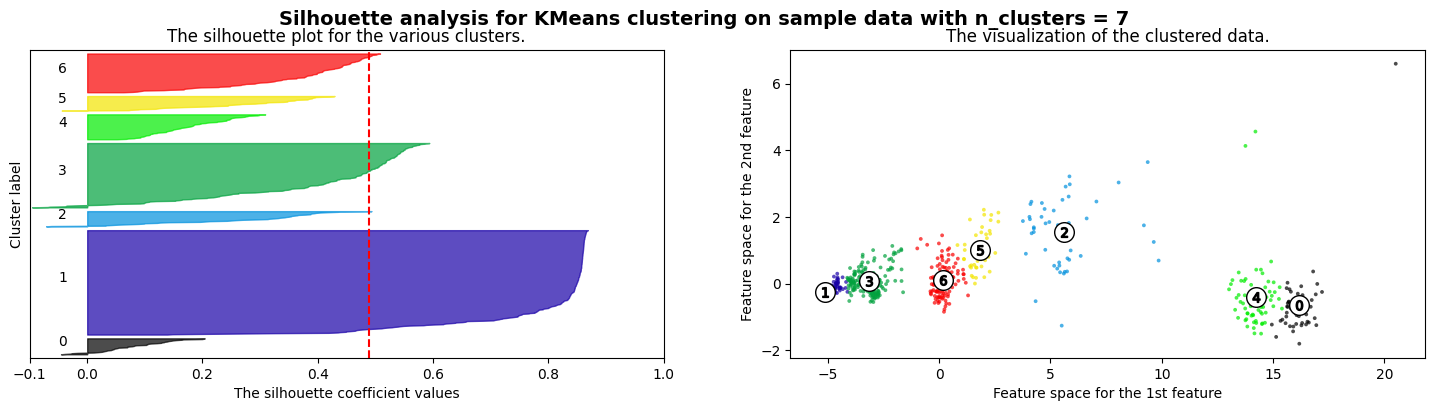

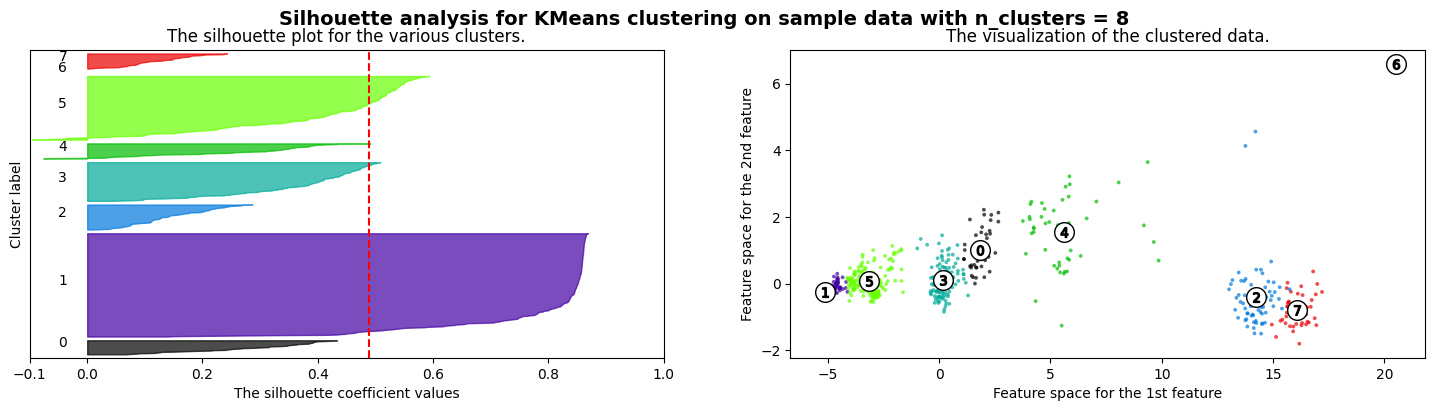

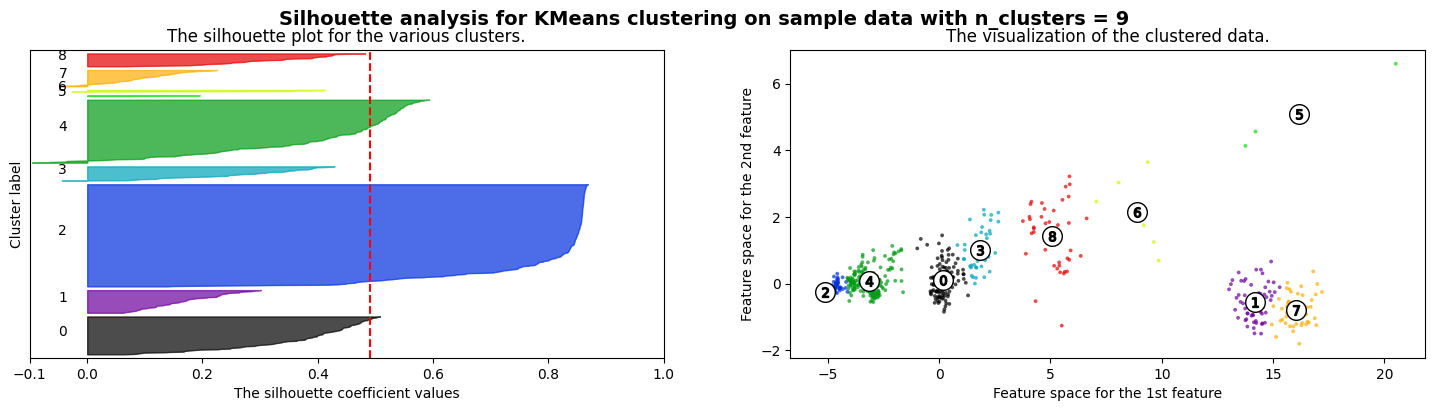

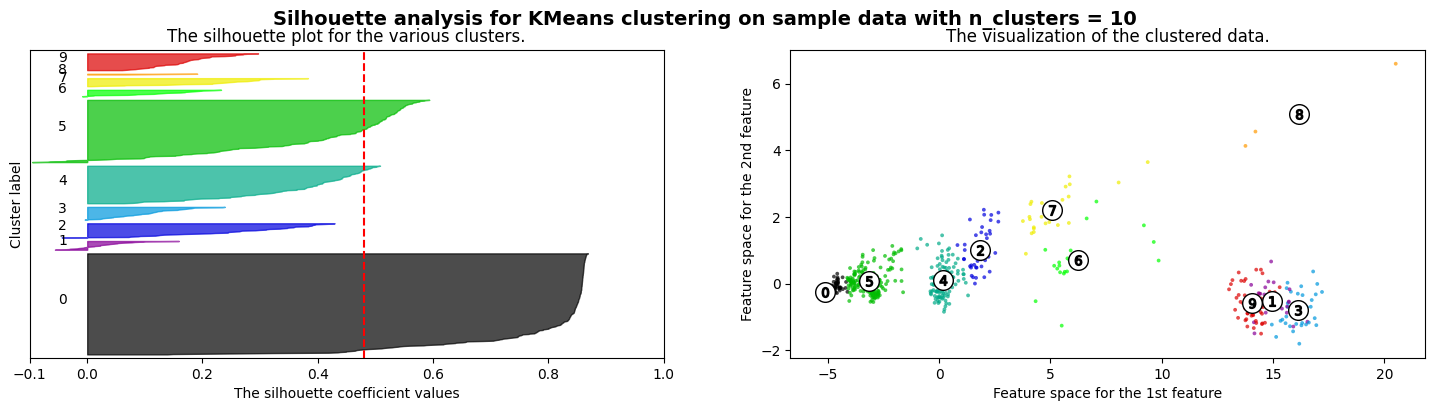

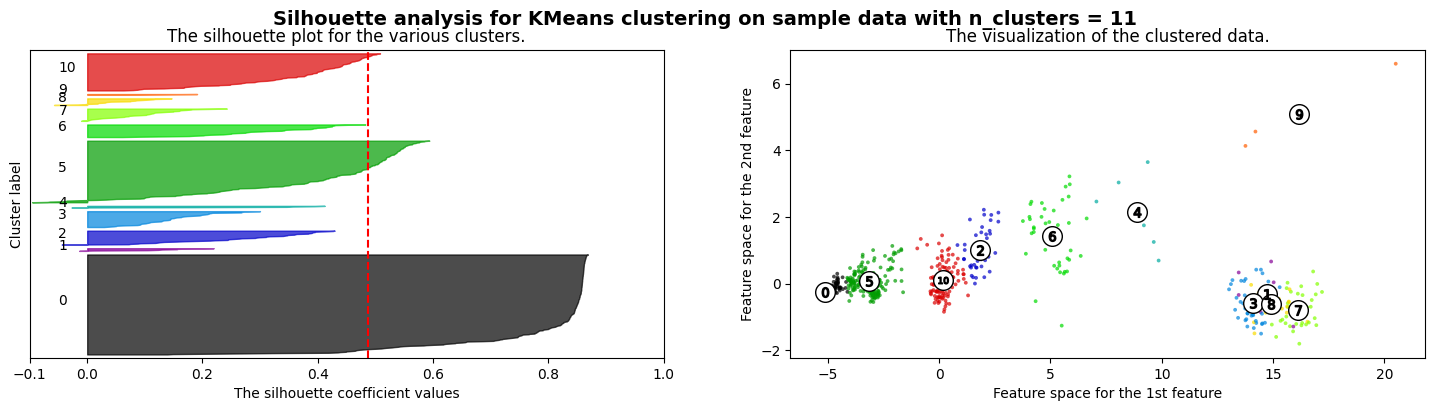

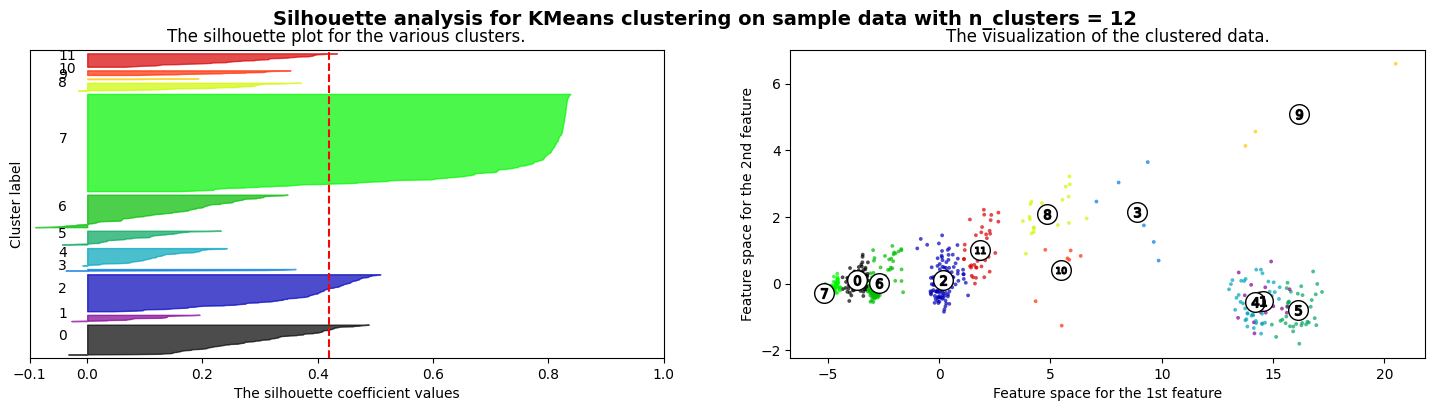

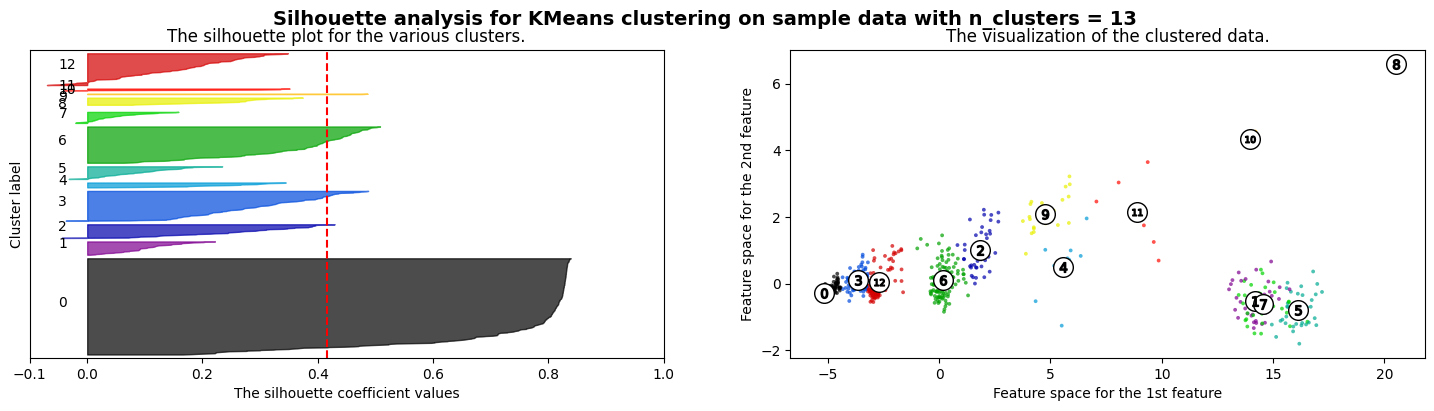

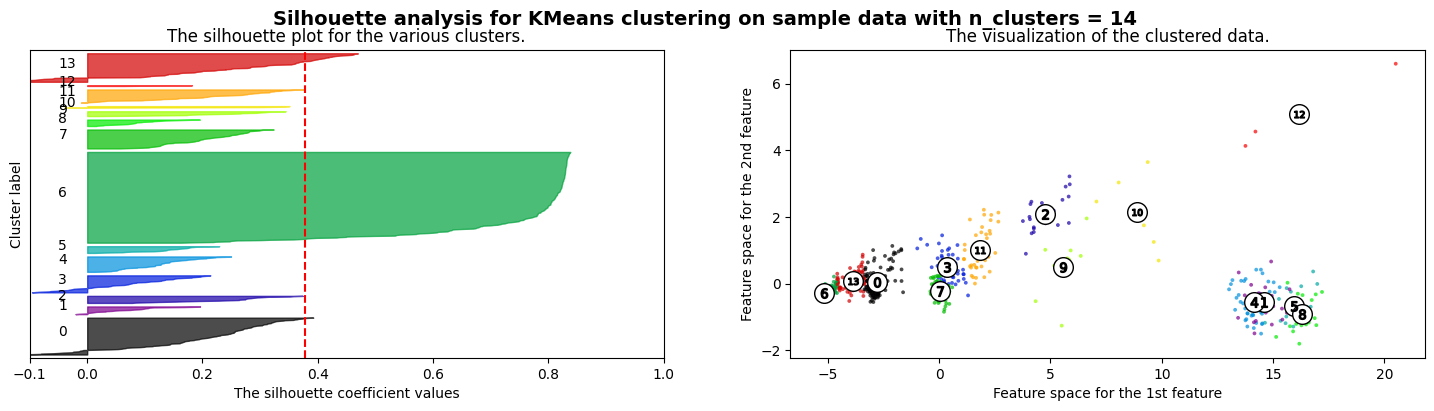

In [10]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), sales_scaled_pca, random_state)

#### Source : yellowbrick

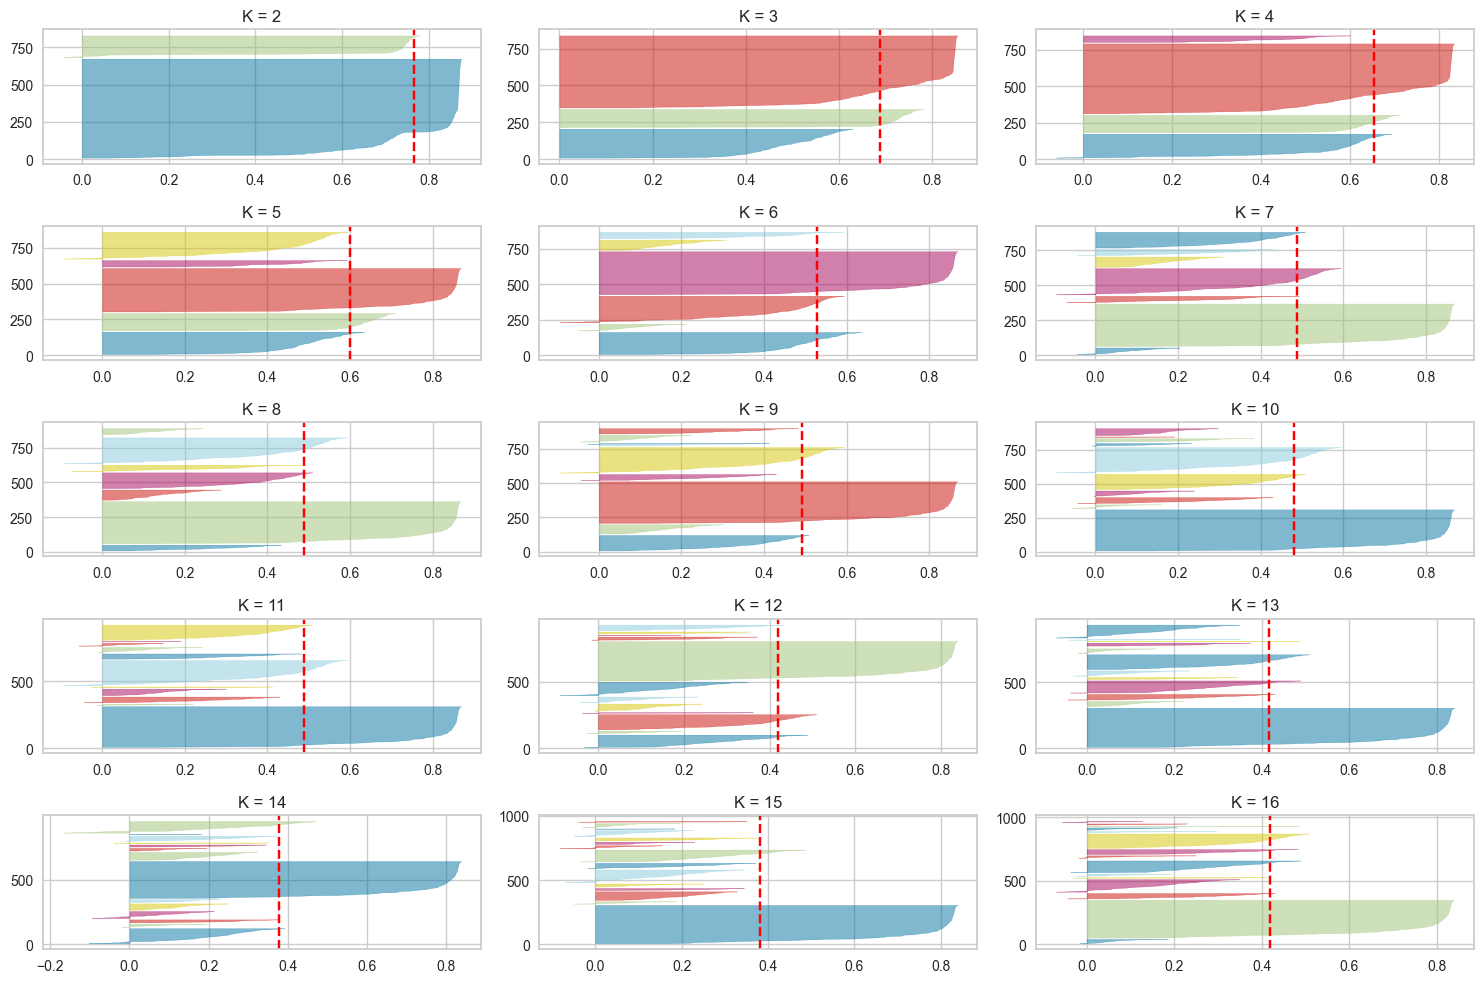

In [12]:
# Display the Silhouette Score and Plot Silhouette Plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(sales_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

---
**CONCLUSION**

* Although `n_cluster=2` yields the highest silhouette score, the data distribution in each cluster appears to be highly imbalanced.

* Based on the cluster distribution plot results, it seems that `n_clusters=4` provides a good visualization.

* Therefore, it can be concluded that based on the Silhouette Plot, the optimal number of clusters is `n_clusters=4`.

**It's important to note that you may have a different opinion, so the optimal number of clusters may vary.**

## A.3 - Train with the Optimal Number of Clusters

In [13]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(sales_scaled_pca)
pred

array([0, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 3, 2, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       2, 3, 2, 3, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 0,
       2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [14]:
# Insert clustering result into original dataset

sales_transactions_df['cluster'] = pred
sales_transactions_df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,cluster
0,P1,11,12,10,8,13,12,14,21,6,...,7,8,10,12,3,7,6,5,10,0
1,P2,7,6,3,2,7,1,6,3,3,...,4,5,1,1,4,5,1,6,0,2
2,P3,7,11,8,9,10,8,7,13,12,...,14,5,5,7,8,14,8,8,7,0
3,P4,12,8,13,5,9,6,9,13,13,...,10,3,4,6,8,14,8,7,8,0
4,P5,8,5,13,11,6,7,9,14,9,...,11,7,12,6,6,5,11,8,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,1,1,0,0,1,0,0,2,0,2
807,P816,0,1,0,0,1,2,2,6,0,...,3,4,2,4,5,5,5,6,5,2
808,P817,1,0,0,0,1,1,2,1,1,...,0,0,2,2,0,0,0,4,3,2
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,2,0,2


<Axes: >

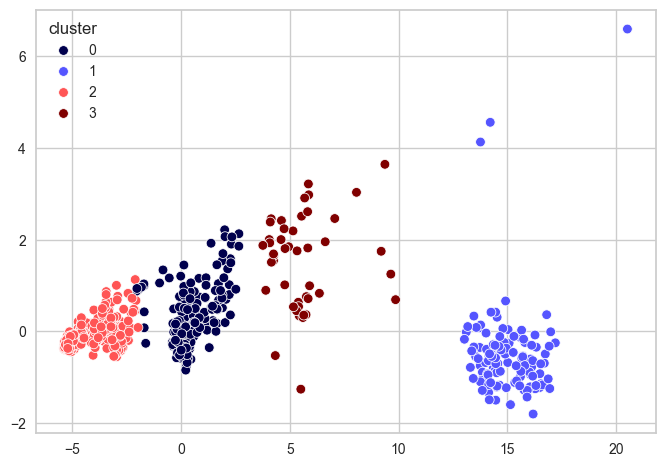

In [15]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(sales_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(sales_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=sales_transactions_df['cluster'], palette='seismic')

## A.4 - After Clustering

The clustering process using KMeans has been completed. However, you should also perform further exploration of each formed cluster. Look for the characteristics of each cluster that has been formed.

In conclusion : **In clustering, it is common to perform two rounds of EDA with the following divisions:**

**1. First EDA**
  * Conducted BEFORE clustering model creation.
  * Its purpose is to understand the general characteristics of the data.

**2. Second EDA** :
  * Performed AFTER clustering model creation.
  * The goal of this EDA is to identify the characteristics of each formed cluster.
  * The right number of clusters will make the distinct characteristics of each cluster clear and different from one another.
  * If you have difficulty finding the distinguishing features of a cluster during this EDA, it may indicate that the `n_cluster` value you set is incorrect.

# B. K-Prototype

In this tutorial, we will use a dataset that contains sales transactions from a company/store.

## B.1 - Data Loading

In [16]:
# Data loading

shop_customers_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w3/P1W3D2AM%20-%20Clustering%20-%20Part%201%20-%20Shop%20Customers.csv')
shop_customers_df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [17]:
# Check dataset

shop_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


For simplicity purposes, let's drop `Country`, `Order Date`, `Order ID`, and `Ship Date`.

In [18]:
# Drop column `Country`, `Order Date`, `Order ID`, and `Ship Date`

customers_df = shop_customers_df.drop(['Country', 'Order Date', 'Order ID', 'Ship Date'], axis=1)
customers_df

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Beverages,Online,C,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Household,Online,C,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Beverages,Online,C,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Beverages,Online,H,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Cosmetics,Online,C,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Vegetables,Offline,M,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,Meat,Online,L,8706,421.89,364.69,3672974.34,3174991.14,497983.20


## B.2 - Preprocessing

In this section, you can apply various Feature Eengineering techniques such as handling missing values, handling outliers, feature scaling, PCA, etc.

For demonstration purposes, this time only Feature Scaling and PCA are carried out.

In [19]:
# Splitting numeric columns and categorical columns

num_columns = customers_df.select_dtypes(include=np.number).columns.tolist()
cat_columns = customers_df.select_dtypes(include=['object']).columns.tolist()

customers_df_num = customers_df[num_columns]
customers_df_cat = customers_df[cat_columns]

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
Cat Columns :  ['Region', 'Item Type', 'Sales Channel', 'Order Priority']


In [20]:
# Feature scaling

scaler = StandardScaler()
customers_df_num_scaled = scaler.fit_transform(customers_df_num)

Text(0, 0.5, 'Eigenvalues')

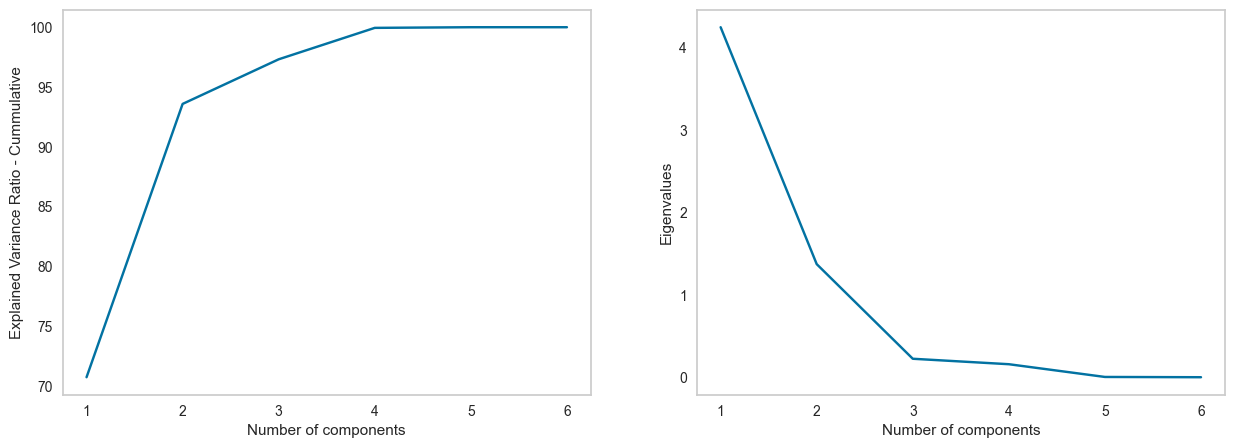

In [21]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_df_num_scaled)

# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 7), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 7), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [22]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(3)

In [23]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=3)
pca.fit(customers_df_num_scaled)

customers_df_num_scaled_pca = pca.transform(customers_df_num_scaled)

In [24]:
# Concate columns

customers_df_final = np.concatenate([customers_df_num_scaled_pca, customers_df_cat], axis=1)
customers_df_final = pd.DataFrame(customers_df_final, columns=[['PCA1', 'PCA2', 'PCA3'] + cat_columns])
customers_df_final = customers_df_final.infer_objects()
customers_df_final

,PCA1,PCA2,PCA3,Region,Item Type,Sales Channel,Order Priority
0,2.736604,-1.411670,-0.415033,Sub-Saharan Africa,Office Supplies,Online,L
1,-2.278017,-0.585007,0.421196,Europe,Beverages,Online,C
2,-0.555511,0.821073,-0.010473,Middle East and North Africa,Vegetables,Offline,C
3,5.077456,0.195961,0.344796,Sub-Saharan Africa,Household,Online,C
4,-1.984885,0.062173,0.028657,Europe,Beverages,Online,C
...,...,...,...,...,...,...,...
9995,-1.365378,1.429928,-0.800937,Asia,Beverages,Online,H
9996,-0.851228,-1.983193,0.100164,Europe,Cosmetics,Online,C
9997,-1.484313,-0.436702,0.269312,Sub-Saharan Africa,Vegetables,Offline,M
9998,2.759565,0.548267,-1.029689,Sub-Saharan Africa,Meat,Online,L


In [25]:
# Get the position of categorical columns

index_cat_columns = [customers_df_final.columns.get_loc(col) for col in list(customers_df_final.select_dtypes('object').columns)]

print('Categorical columns        : ', cat_columns)
print('Categorical columns index  : ', index_cat_columns)

Categorical columns        :  ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
Categorical columns index  :  [3, 4, 5, 6]


## B.3 - Find the Optimal Number of Clusters

Just like K-Means, to find the optimal number of clusters in K-Prototype, we can use Elbow Method. We will choose an “elbow point” on the plot where the rate of decrease in cost/variance starts to slow down. This point indicates a potential optimal K.

In [ ]:
# Install library `kmodes`

#!pip install kmodes

Cluster creation :  2
Cluster creation :  3
Cluster creation :  4
Cluster creation :  5
Cluster creation :  6


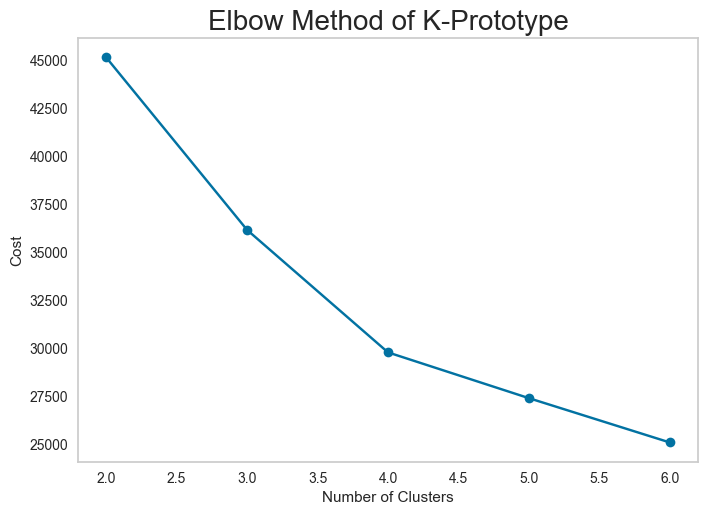

In [29]:
# Find the optimal number of clusters using Elbow Method
#%%time
from kmodes.kprototypes import KPrototypes

max_clusters = 6
cost = []
for k in range(2, max_clusters+1):
  kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
  kproto.fit_predict(customers_df_final, categorical=index_cat_columns)
  cost.append(kproto.cost_)
  print('Cluster creation : ', k)

plt.plot(range(2, max_clusters+1), cost, marker ="o")
plt.grid()
plt.title('Elbow Method of K-Prototype', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

Based on plt above, it can be seen that the optimal number of clusters is 4.

## B.4 - Train with the Optimal Number of Clusters

In [31]:
# Train with optimal number of clusters

#%%time
kp = KPrototypes(n_clusters=4, random_state=42)
pred = kp.fit_predict(customers_df_final, categorical=index_cat_columns)
pred

array([2, 3, 1, ..., 3, 0, 3], dtype=uint16)

In [32]:
# Insert clustering result into original dataset

shop_customers_df['cluster'] = pred
shop_customers_df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,cluster
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00,2
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50,3
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95,1
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,0
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02,1
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94,2
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12,3
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20,0
